In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import string
import re

from tensorflow.keras.layers import Dense, Flatten, Input, concatenate, Embedding, LSTM, TextVectorization, Bidirectional, Dropout

In [2]:
ENGLISH_STOP_WORDS = [
    'a','s','i',
    '000', '2014',
    'about',
    'above',
    'across',
    'after',
    'afterwards',
    'again',
    'ain',
    'all',
    'almost',
    'alone',
    'along',
    'already',
    'also',
    'although',
    'always',
    'am',
    'among',
    'amongst',
    'amoungst',
    'amount',
    'an',
    'and',
    'another',
    'any',
    'anyhow',
    'anyone',
    'anything',
    'anyway',
    'anywhere',
    'are',
    'aren',
    'around',
    'as',
    'at',
    'back',
    'be',
    'became',
    'because',
    'become',
    'becomes',
    'becoming',
    'been',
    'before',
    'beforehand',
    'behind',
    'being',
    'below',
    'beside',
    'besides',
    'between',
    'beyond',
    'bill',
    'both',
    'bottom',
    'but',
    'by',
    'call',
    'co',
    'con',
    'could',
    'couldn',
    'couldnt',
    'cry',
    'd',
    'de',
    'describe',
    'detail',
    'did',
    'didn',
    'do',
    'does',
    'doesn',
    'doing',
    'don',
    'done',
    'down',
    'due',
    'during',
    'each',
    'eg',
    'eight',
    'either',
    'eleven',
    'else',
    'elsewhere',
    'empty',
    'enough',
    'etc',
    'even',
    'ever',
    'every',
    'everyone',
    'everything',
    'everywhere',
    'except',
    'few',
    'fifteen',
    'fify',
    'fill',
    'find',
    'fire',
    'first',
    'five',
    'for',
    'former',
    'formerly',
    'forty',
    'found',
    'four',
    'from',
    'front',
    'full',
    'further',
    'get',
    'give',
    'go',
    'had',
    'hadn',
    'has',
    'hasn',
    'hasnt',
    'have',
    'haven',
    'having',
    'he',
    'hence',
    'her',
    'here',
    'hereafter',
    'hereby',
    'herein',
    'hereupon',
    'hers',
    'herself',
    'him',
    'himself',
    'his',
    'how',
    'however',
    'hundred',
    'i',
    'ie',
    'if',
    'in',
    'inc',
    'indeed',
    'interest',
    'into',
    'is',
    'isn',
    'it',
    'its',
    'itself',
    'just',
    'keep',
    'last',
    'latter',
    'latterly',
    'least',
    'less',
    'll',
    'ltd',
    'm',
    'ma',
    'made',
    'many',
    'may',
    'me',
    'meanwhile',
    'might',
    'mightn',
    'mill',
    'mine',
    'more',
    'moreover',
    'most',
    'mostly',
    'move',
    'much',
    'must',
    'mustn',
    'my',
    'myself',
    'name',
    'namely',
    'needn',
    'neither',
    'never',
    'nevertheless',
    'next',
    'nine',
    'no',
    'nobody',
    'none',
    'noone',
    'nor',
    'nothing',
    'now',
    'nowhere',
    'o',
    'of',
    'off',
    'often',
    'on',
    'once',
    'one',
    'only',
    'onto',
    'or',
    'other',
    'others',
    'otherwise',
    'our',
    'ours',
    'ourselves',
    'out',
    'over',
    'own',
    'part',
    'per',
    'perhaps',
    'please',
    'put',
    'rather',
    're',
    's',
    'same',
    'see',
    'seem',
    'seemed',
    'seeming',
    'seems',
    'serious',
    'several',
    'shan',
    'she',
    'should',
    'shouldn',
    'show',
    'side',
    'since',
    'sincere',
    'six',
    'sixty',
    'so',
    'some',
    'somehow',
    'someone',
    'something',
    'sometime',
    'sometimes',
    'somewhere',
    'still',
    'such',
    'system',
    't',
    'take',
    'ten',
    'than',
    'that',
    'the',
    'their',
    'theirs',
    'them',
    'themselves',
    'then',
    'thence',
    'there',
    'thereafter',
    'thereby',
    'therefore',
    'therein',
    'thereupon',
    'these',
    'they',
    'thick',
    'thin',
    'third',
    'this',
    'those',
    'though',
    'three',
    'through',
    'throughout',
    'thru',
    'thus',
    'to',
    'together',
    'too',
    'top',
    'toward',
    'towards',
    'twelve',
    'twenty',
    'two',
    'un',
    'under',
    'until',
    'up',
    'upon',
    'us',
    've',
    'very',
    'via',
    'was',
    'wasn',
    'we',
    'well',
    'were',
    'weren',
    'what',
    'whatever',
    'when',
    'whence',
    'whenever',
    'where',
    'whereafter',
    'whereas',
    'whereby',
    'wherein',
    'whereupon',
    'wherever',
    'whether',
    'which',
    'while',
    'whither',
    'who',
    'whoever',
    'whole',
    'whom',
    'whose',
    'why',
    'will',
    'with',
    'within',
    'without',
    'won',
    'would',
    'wouldn',
    'y',
    'yet',
    'you',
    'your',
    'yours',
    'yourself',
    'yourselves'
]
SPECIAL_CHARS = "\"#$%&'()’“*+,/:;<=>@”[\\«]^»‘`”'-{|}~\t\n―"

In [3]:
train_bodies_path = "fnc-1/train_bodies.csv"
train_headlines_path = "fnc-1/train_stances.csv"

test_bodies_path = "fnc-1/competition_test_bodies.csv"
test_headlines_path= "fnc-1/competition_test_stances.csv"


bodies_df_train = pd.read_csv(train_bodies_path)
stances_df_train = pd.read_csv(train_headlines_path)
df_train = pd.merge(bodies_df_train, stances_df_train, how='right', on='Body ID')

bodies_df_test = pd.read_csv(test_bodies_path)
stances_df_test = pd.read_csv(test_headlines_path)
df_test = pd.merge(bodies_df_test, stances_df_test, how='right', on='Body ID')

In [4]:
def clean_text(text):
  text = text.translate(str.maketrans('', '', string.punctuation))
  no_num = re.sub(r'[0-9]', '', text)
  no_stops = " ".join([x for x in no_num.lower().split() if x not in ENGLISH_STOP_WORDS])
  return no_stops

In [5]:
def get_score(y_pred, y_true):
    n = len(y_pred)
    related = ["agree","disagree","discuss"]
    score = 0
    for i in range(n):
        if y_pred[i] == y_true[i]:
            score+=0.25
            if y_true[i]!='unrelated':
                score+=0.50
        if y_pred[i] in related and y_true[i] in related:
            score+=0.25
    print("Model Score:",score)
    return

In [6]:
train_bodies_clean = bodies_df_train['articleBody'].apply(clean_text)
train_headings_clean = stances_df_train['Headline'].apply(clean_text)

test_bodies_clean = bodies_df_test['articleBody'].apply(clean_text)
test_headings_clean = stances_df_test['Headline'].apply(clean_text)

In [7]:
df_train.head()

,Body ID,articleBody,Headline,Stance
0,712,Danny Boyle is directing the untitled film\n\n...,Police find mass graves with at least '15 bodi...,unrelated
1,158,Hundreds of Palestinians were evacuated from t...,Hundreds of Palestinians flee floods in Gaza a...,agree
2,137,30-year-old Moscow resident was hospitalized w...,"Christian Bale passes on role of Steve Jobs, a...",unrelated
3,1034,(Reuters) - A Canadian soldier was shot at the...,HBO and Apple in Talks for $15/Month Apple TV ...,unrelated
4,1923,"Fear not arachnophobes, the story of Bunbury's...",Spider burrowed through tourist's stomach and ...,disagree


In [8]:
df_train['body_clean'] = df_train['articleBody'].apply(clean_text)
df_train['headline_clean'] = df_train['Headline'].apply(clean_text)

df_test['body_clean'] = df_test['articleBody'].apply(clean_text)
df_test['headline_clean'] = df_test['Headline'].apply(clean_text)

In [9]:
print("Train Bodies: ",len(train_bodies_clean))
print("Train Headings: ",len(train_headings_clean))

print("Test Bodies: ",len(test_bodies_clean))
print("Test Headings: ",len(test_headings_clean))

Train Bodies:  1683
Train Headings:  49972
Test Bodies:  904
Test Headings:  25413


In [10]:
EMBEDDING_DIM=100

heading_vector_layer = TextVectorization(max_tokens=1000, output_mode='int',output_sequence_length=50)
heading_vector_layer.adapt(train_headings_clean)

body_vector_layer = TextVectorization(max_tokens=1000,output_mode='int',output_sequence_length=100)
body_vector_layer.adapt(train_bodies_clean)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-08-05 14:23:37.187001: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-05 14:23:37.189693: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-08-05 14:23:37.488152: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-05 14:23:37.850614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-05 14:23:40.663338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [11]:
h_vocab = heading_vector_layer.get_vocabulary()
b_vocab = body_vector_layer.get_vocabulary()

In [ ]:
!wget --no-check-certificate \
     http://nlp.stanford.edu/data/glove.6B.zip \
     -O /content/drive/fnc/glove.6B.zip

--2022-08-01 05:53:11--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-08-01 05:53:12--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-08-01 05:53:12--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/tmp/glove.6B.zip’


In [12]:
!ls

Ahmed_Anwar_GradientBoostingClassifier_Milestone1.zip
Bert.ipynb
Conditional_Encoding.ipynb
Encoder_decoder.ipynb
LICENSE
README.md
Transformers.ipynb
__pycache__
answer.csv
answer_bert.csv
cosine.ipynb
feature_engineering.py
features
fnc-1
fnc.ipynb
fnc_kfold.py
glove
glove.6B.zip
milestone2
milestone2.ipynb
model.png
multi_input_and_output_model.png
mymodel.h5
neg.txt
pos.txt
predictions.pkl
requirements.txt
scores
splits
utils
x_competition.pkl


In [ ]:
import os
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/fnc/glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/fnc/glove')

In [13]:
import numpy as np
embeddings_index = {}
f = open('glove/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [14]:
max_length = 100
padding_type='post'
truncation_type='post'

not_found = 0
embedding_matrix_heading = np.zeros((len(h_vocab) + 1, max_length))
for i, word in enumerate(h_vocab):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix_heading[i] = embedding_vector

embedding_matrix_body = np.zeros((len(b_vocab) + 1, max_length))
for i, word in enumerate(b_vocab):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix_body[i] = embedding_vector


#### Text Vectorization Layer

#### Model Cnstruction

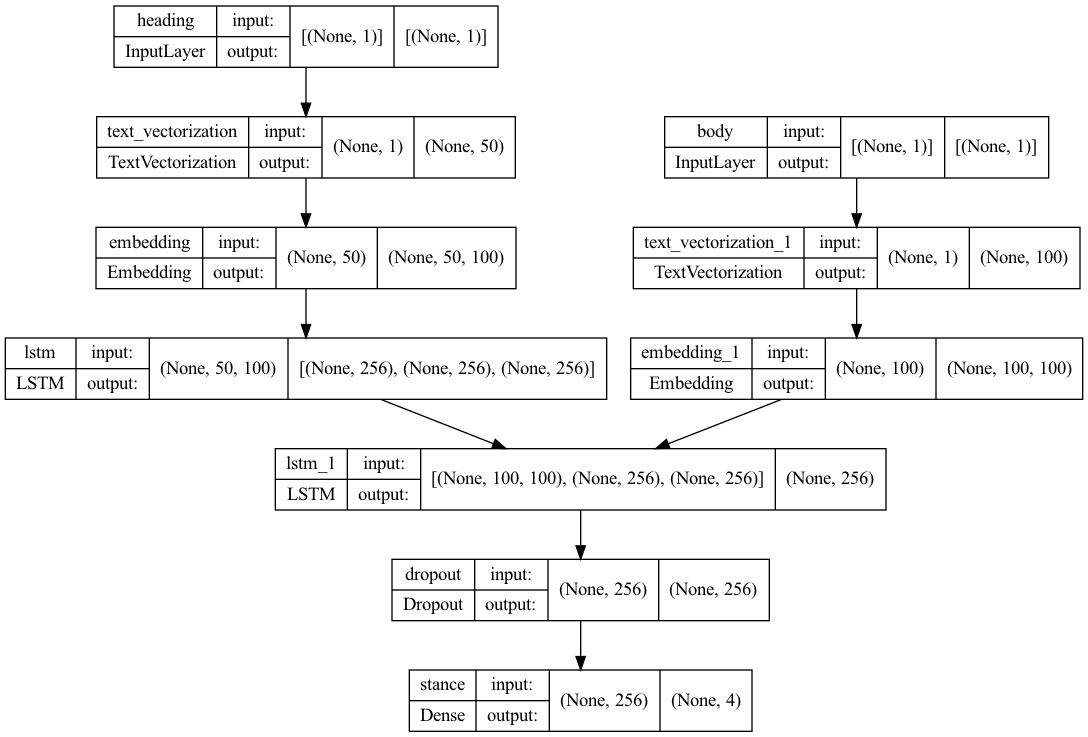

In [15]:
heading_input = Input(shape=(1,),name='heading',dtype=tf.string)
heading_vectors = heading_vector_layer(heading_input)
h_embedding_layer = Embedding(input_dim=1001, output_dim=EMBEDDING_DIM, trainable=True, weights=[embedding_matrix_heading])
h_features = h_embedding_layer(heading_vectors)

encoder = LSTM(256, return_state=True)
encoder_outputs, state_h, state_c = encoder(h_features)
encoder_states = [state_h,state_c] 

body_input = Input(shape=(1,),name='body', dtype=tf.string)
body_vectors = body_vector_layer(body_input)
b_embedding_layer = Embedding(input_dim=1001, output_dim=EMBEDDING_DIM, trainable=True, weights=[embedding_matrix_body])
b_features = b_embedding_layer(body_vectors)
decoder_lstm = LSTM(256)
decoder_outputs= decoder_lstm(b_features, initial_state=encoder_states)

drop1 = Dropout(0.4)
drop1_out = drop1(decoder_outputs)

decoder_dense = Dense(4, activation='softmax',name='stance')
decoder_outputs = decoder_dense(drop1_out)



model = tf.keras.Model(
    inputs=[heading_input,body_input],
    outputs = [decoder_outputs])

#plot the model
tf.keras.utils.plot_model(model,  show_shapes=True)

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
LABELS_MAP = {'agree':0, 'disagree':1, 'discuss':2, 'unrelated':3}
labels_train = [LABELS_MAP[x] for x in df_train['Stance']]
labels_test = [LABELS_MAP[x] for x in df_test['Stance']]

In [18]:
history = model.fit(
    x={'heading': np.array(df_train['headline_clean']), 'body':np.array(df_train['body_clean'])},y={'stance':np.array(labels_train)},
    epochs=10, workers=6, use_multiprocessing=True, batch_size=64,
    validation_data=[{'heading':np.array(df_test['headline_clean']), 'body':np.array(df_test['body_clean'])},{'stance':np.array(labels_test)}]
)

Epoch 1/10


2022-08-05 14:26:10.706694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-05 14:26:11.798425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-05 14:26:12.696655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-05 14:26:13.590831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-05 14:26:14.480056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


781/781 [==============================] - ETA: 0s - loss: 0.7270 - accuracy: 0.7440

2022-08-05 14:28:47.038843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-05 14:28:47.460000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-05 14:28:48.013114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


781/781 [==============================] - 190s 230ms/step - loss: 0.7270 - accuracy: 0.7440 - val_loss: 0.9116 - val_accuracy: 0.6924
Epoch 2/10
781/781 [==============================] - 185s 237ms/step - loss: 0.6171 - accuracy: 0.7772 - val_loss: 1.0168 - val_accuracy: 0.6472
Epoch 3/10
781/781 [==============================] - 85s 109ms/step - loss: 0.5726 - accuracy: 0.7878 - val_loss: 1.0317 - val_accuracy: 0.6405
Epoch 4/10
781/781 [==============================] - 93s 119ms/step - loss: 0.5481 - accuracy: 0.7966 - val_loss: 1.1052 - val_accuracy: 0.6058
Epoch 5/10
781/781 [==============================] - 95s 122ms/step - loss: 0.5296 - accuracy: 0.8031 - val_loss: 1.1256 - val_accuracy: 0.6060
Epoch 6/10
781/781 [==============================] - 99s 127ms/step - loss: 0.5172 - accuracy: 0.8071 - val_loss: 1.2179 - val_accuracy: 0.5932
Epoch 7/10
781/781 [==============================] - 101s 129ms/step - loss: 0.5081 - accuracy: 0.8104 - val_loss: 1.1638 - val_accuracy: 

In [20]:
model_predictions = model.predict(x={'heading':np.array(df_test['headline_clean']), 'body':np.array(df_test['body_clean'])})

Int_to_label = {0:'agree', 1:'disagree', 2:'discuss', 3:'unrelated'}
y_pred = [Int_to_label[y] for y in [x.argmax() for x in model_predictions]]

2022-08-05 15:25:38.801834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-05 15:25:39.242171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-05 15:25:39.566953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [21]:
get_score(y_pred, df_test['Stance'])

Model Score: 4700.75
